In [2]:
import scipy.io as scio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dqn_reward = scio.loadmat('./dqn_reward.mat')
dueldqn_reward = scio.loadmat('./dueldqn_reward.mat')
ddqn_reward = scio.loadmat('./ddqn_reward.mat')
d3qn_reward = scio.loadmat('./d3qn_reward.mat')
d3qn_pre_reward = scio.loadmat('./d3qn_pre_reward.mat')


In [4]:
dqn_reward = dqn_reward['reward'][0]
dueldqn_reward = dueldqn_reward['reward'][0]
ddqn_reward = ddqn_reward['reward'][0]
d3qn_reward = d3qn_reward['reward'][0]
d3qn_pre_reward = d3qn_pre_reward['reward'][0]
# # window_size = 10
# # dqn_moving_avg = np.convolve(dqn_reward.flatten(), np.ones(window_size)/window_size, mode='valid')
# # dueldqn_moving_avg = np.convolve(dueldqn_reward.flatten(), np.ones(window_size)/window_size, mode='valid')
# # ddqn_moving_avg = np.convolve(ddqn_reward.flatten(), np.ones(window_size)/window_size, mode='valid')
# # d3qn_moving_avg = np.convolve(d3qn_reward.flatten(), np.ones(window_size)/window_size, mode='valid')
# sns.lineplot(data=d3qn_pre_reward,orient="y")
columns=['dqn_reward','dueldqn_reward','ddqn_reward','d3qn_reward','d3qn_pre_reward']
j = 0
reward_data = {'name':[],'reward':[],'episode':[]}
for name in [dqn_reward, dueldqn_reward,ddqn_reward,d3qn_reward,d3qn_pre_reward]:
    for i in range(len(dqn_reward)-1):
        # print(j)
        reward_data['episode'].append(int(i))
        reward_data['name'].append(columns[j])
        reward_data['reward'].append(name[i])
    j+=1
# reward_data = {
#     'dqn_reward':dqn_reward，
#     'dueldqn_reward':dueldqn_reward,
#     'ddqn_reward':ddqn_reward,
#     'd3qn_reward':d3qn_reward,
#     'd3qn_pre_reward':d3qn_pre_reward,
# }
reward_df = pd.DataFrame(reward_data, columns=['name','episode','reward'])

In [4]:
# reward_df.head()

In [5]:
# sns.relplot(reward_df,kind="line",x='episode',y='reward',hue='name', ci=95)


In [5]:
x_label = range(400)
x_label_avg = range(371)
# # Define the color for the first line (R:177, G:24, B:16)
line_color1 = (177/255, 24/255, 16/255)
line_color2 = (249/255, 196/255, 83/255)
line_color3 = (157/255, 186/255, 194/255)
line_color4 = (69/255, 116/255, 133/255)
line_color5 = (23/255, 51/255, 65/255)
line_color6 = '#E1E1D5'
# 为每个类别设置自定义颜色
# custom_palette = {
#     'ecm': line_color6,  # 自定义颜色
#     'dqn': line_color5,
#     'dueldqn': line_color4,
#     'ddqn': line_color3,
#     'd3qn': line_color2,
#     'd3qnpre': line_color1
# }


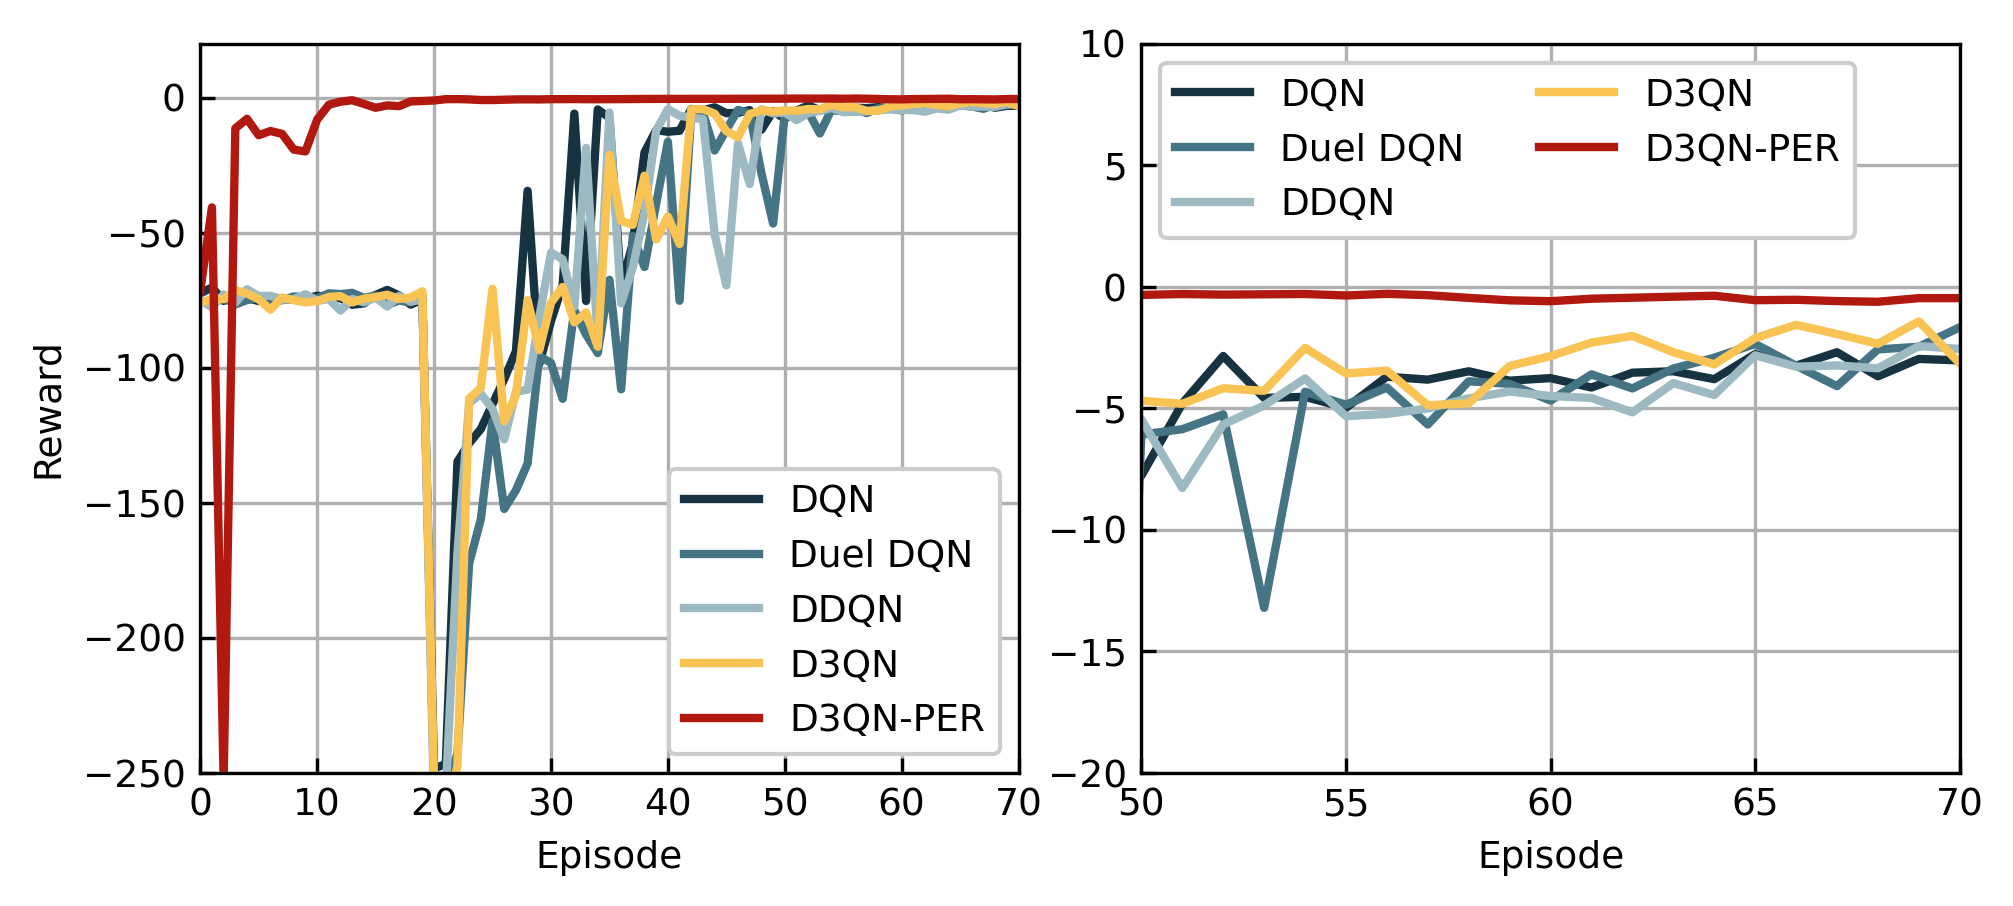

In [19]:
fig, [ax1,ax2,] = plt.subplots(1, 2, sharex=False, sharey=False, facecolor='white', figsize=(6.9,3), dpi=300,)
fig.subplots_adjust(left=0.1, right=0.95, top=0.98, bottom=0.17,hspace=0.05,wspace=0.15)

loc_inf = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline',}
ncol_num = 1
label_name = ['DQN', 'Duel DQN', 'DDQN', 'D3QN','D3QN-PER']
# Set font size for the plot elements
plt.rcParams.update({'font.size': 9})  # 9pt for all text

# Plot the first four lines with 60% opacity and double the line width
ax1.plot(x_label, dqn_reward,  linewidth=2, color = line_color5)
ax1.plot(x_label, dueldqn_reward,  linewidth=2, color = line_color4)
ax1.plot(x_label, ddqn_reward,  linewidth=2, color = line_color3)
ax1.plot(x_label, d3qn_reward,  linewidth=2, color = line_color2)
ax1.plot(x_label, d3qn_pre_reward,  linewidth=2, color = line_color1)

ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')

ax1.legend(loc=4, framealpha=1, labels=label_name, ncol=ncol_num)
ax1.grid()
# ax1.text(0.5, 0.95, title_name[0], loc_inf, transform=ax1.transAxes)
ax1.set_xlim(0, 70)
ax1.set_ylim(-250,20)
ax1.tick_params(axis='both', direction='in')

# Plot the averaged lines with default settings
ax2.plot(x_label, dqn_reward, linewidth=2,color = line_color5)
ax2.plot(x_label, dueldqn_reward, linewidth=2,color = line_color4)
ax2.plot(x_label, ddqn_reward, linewidth=2,color = line_color3)
ax2.plot(x_label, d3qn_reward, linewidth=2,color = line_color2)
ax2.plot(x_label, d3qn_pre_reward, linewidth=2,color = line_color1)

ax2.set_xlabel('Episode')
# ax2.set_ylabel('Reward')
ax2.legend(loc=2, framealpha=1, labels=label_name, ncol=2)
ax2.grid()
# ax1.text(0.5, 0.95, title_name[0], loc_inf, transform=ax1.transAxes)
ax2.set_xlim(50,70)
ax2.set_ylim(-20, 10)
# Change ticks direction to inward
ax2.tick_params(axis='both', direction='in')
# # Save the figure as a TIFF file
fig.savefig('reward.tiff', format='tiff', dpi=300)



In [8]:
# fmri = sns.load_dataset("fmri")
# fmri.head()
# ecm = scio.loadmat('./ecm.mat')
# ecm['FCS_pwr']

In [9]:
ecm = scio.loadmat('./ecm.mat')
dqn = scio.loadmat('./dqn.mat')
dueldqn = scio.loadmat('./dueldqn.mat')
ddqn = scio.loadmat('./ddqn.mat')
d3qn = scio.loadmat('./d3qn.mat')
d3qn_pre = scio.loadmat('./d3qn_pre.mat')

In [10]:
keys = ['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr', 
        'Mot_eta', 'Bat_soc','Bat_vol', 'Bat_cur', 'Bat_pwr', 
        'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
        'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC',
        'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH']
ecm_data = {}
dqn_data = {}
dueldqn_data = {}
ddqn_data = {}
d3qn_data = {}
d3qn_pre_data = {}
for key in ['Bat_pwr', 'FC_fuel', 'FCS_pwr','soc']:
    ecm_data[key] = np.array(ecm[key]).flatten()
for key in keys:
    dqn_data[key] = np.array(dqn[key]).flatten()
    dueldqn_data[key] = np.array(dueldqn[key]).flatten()
    ddqn_data[key] = np.array(ddqn[key]).flatten()
    d3qn_data[key] = np.array(d3qn[key]).flatten()
    d3qn_pre_data[key] = np.array(d3qn_pre[key]).flatten()
ecm_df = pd.DataFrame(ecm_data, columns=['Bat_pwr', 'FCS_pwr',  'FC_fuel'])
dqn_df = pd.DataFrame(dqn_data, columns=['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr',
                                 'Mot_eta', 'Bat_soc', 'Bat_vol', 'Bat_cur', 'Bat_pwr', 
                                 'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
                                 'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC', 
                                 'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH'])
dueldqn_df = pd.DataFrame(dueldqn_data, columns=['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr',
                                 'Mot_eta', 'Bat_soc', 'Bat_vol', 'Bat_cur', 'Bat_pwr', 
                                 'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
                                 'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC', 
                                 'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH'])
ddqn_df = pd.DataFrame(ddqn_data, columns=['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr',
                                 'Mot_eta', 'Bat_soc', 'Bat_vol', 'Bat_cur', 'Bat_pwr', 
                                 'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
                                 'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC', 
                                 'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH'])
d3qn_df = pd.DataFrame(d3qn_data, columns=['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr',
                                 'Mot_eta', 'Bat_soc', 'Bat_vol', 'Bat_cur', 'Bat_pwr', 
                                 'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
                                 'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC', 
                                 'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH'])
d3qn_pre_df = pd.DataFrame(d3qn_pre_data, columns=['P_dem_m', 'P_dem_e', 'Mot_spd', 'Mot_trq', 'Mot_pwr',
                                 'Mot_eta', 'Bat_soc', 'Bat_vol', 'Bat_cur', 'Bat_pwr', 
                                 'FCS_pwr', 'FCS_eta', 'FC_fuel', 'EMS_reward', 
                                 'soc_cost', 'h2_equal', 'h2_money', 'Percentage_FC', 
                                 'FcDegSum', 'mbat_deg', 'Percentage_Bat', 'FCS_SOH', 'Batt_SOH'])

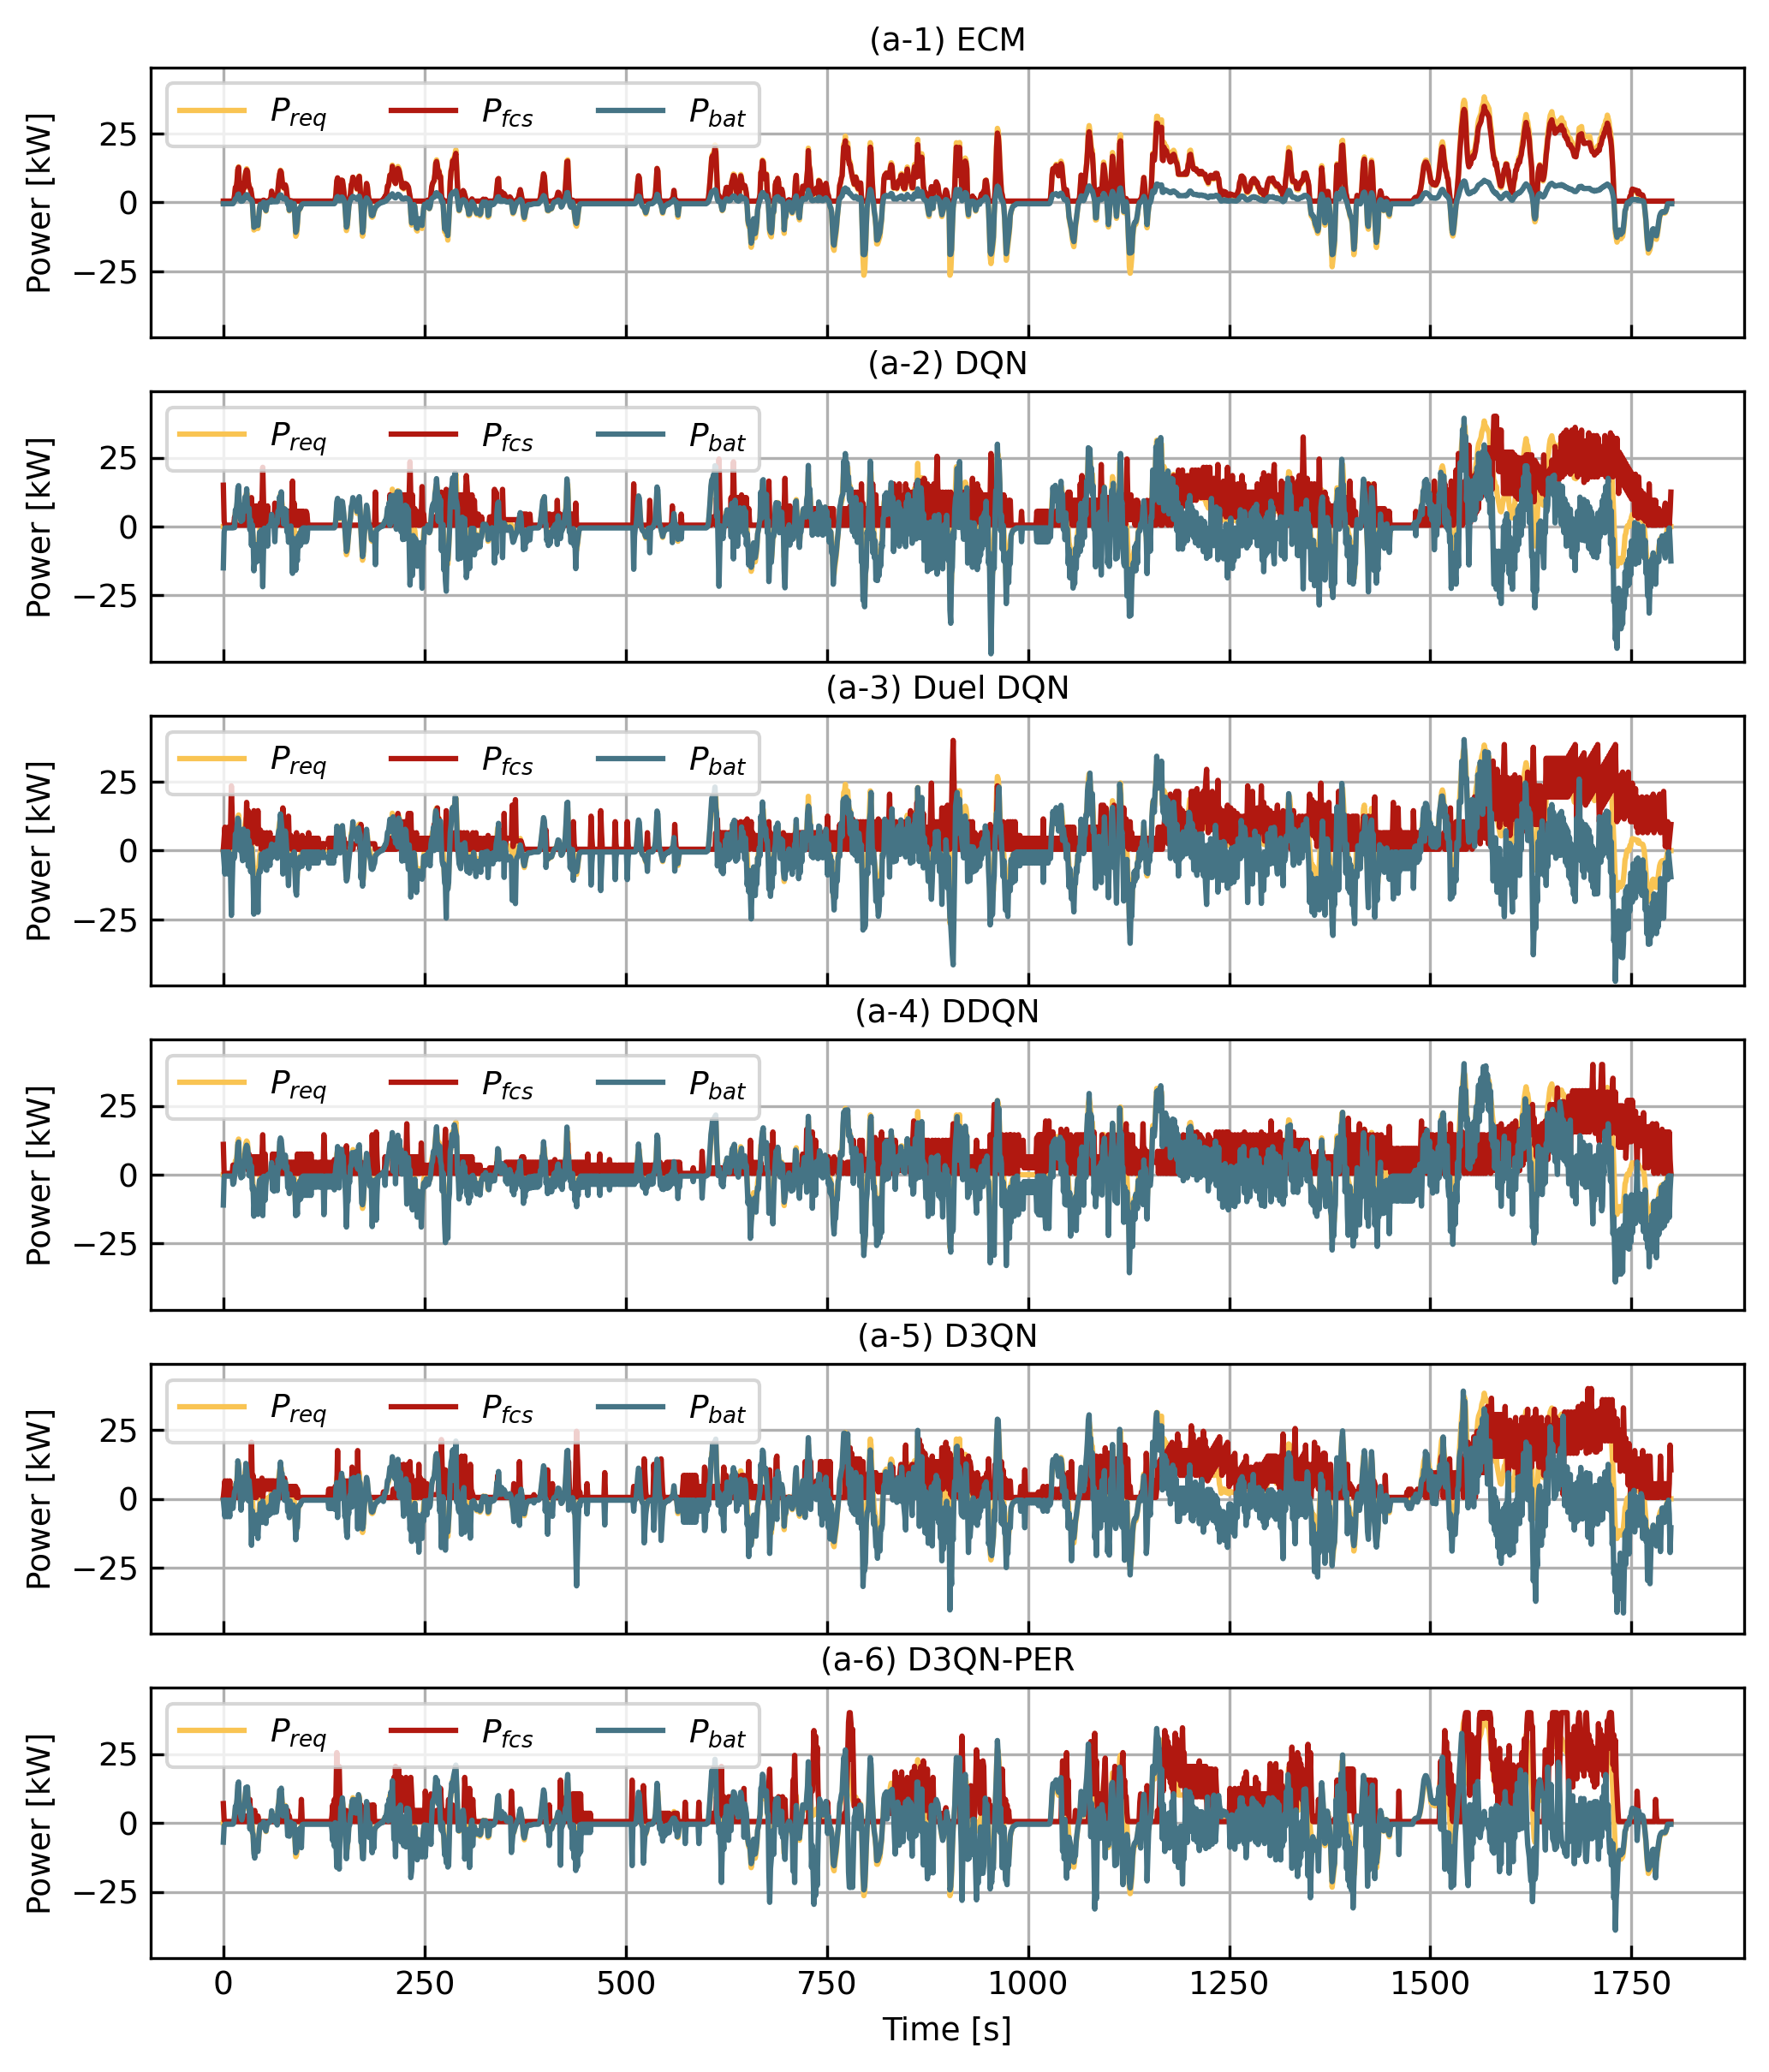

In [11]:
fig, [ax1,ax2,ax3,ax4,ax5,ax6] = plt.subplots(6, 1, sharex=True, sharey=False, facecolor='white', figsize=(6.93,8), dpi=300)
fig.subplots_adjust(left=0.1, right=0.995, top=0.97, bottom=0.05,hspace=0.2,wspace=0.05)

ncol_num = 3
title_name = ['(a-1) ECM','(a-2) DQN','(a-3) Duel DQN','(a-4) DDQN','(a-5) D3QN', '(a-6) D3QN-PER']
label_name = ['$P_{req}$','$P_{fcs}$','$P_{bat}$',]
# loc_inf = {'horizontalalignment':'center','verticalalignment':'center_baseline',}

cycle_idx = 1
x_lim = len(dqn['FCS_pwr'][0])

ax1.plot(dqn['Mot_pwr'] / 1000, color=line_color2)
ax1.plot(ecm['FCS_pwr'] , color=line_color1)
ax1.plot(ecm['Bat_pwr'] , color = line_color4)

ax2.plot(dqn['Mot_pwr'] / 1000, color=line_color2)
ax2.plot(dqn['FCS_pwr'] / 1000, color=line_color1)
ax2.plot(dqn['Bat_pwr'] / 1000, color = line_color4)

ax3.plot(dueldqn['Mot_pwr'] / 1000, color=line_color2)
ax3.plot(dueldqn['FCS_pwr'] / 1000, color=line_color1)
ax3.plot(dueldqn['Bat_pwr'] / 1000, color = line_color4)

ax4.plot(ddqn['Mot_pwr'] / 1000, color=line_color2)
ax4.plot(ddqn['FCS_pwr'] / 1000, color=line_color1)
ax4.plot(ddqn['Bat_pwr'] / 1000, color = line_color4)

ax5.plot(d3qn['Mot_pwr'] / 1000, color=line_color2)
ax5.plot(d3qn['FCS_pwr'] / 1000, color=line_color1)
ax5.plot(d3qn['Bat_pwr'] / 1000, color = line_color4)

ax6.plot(d3qn_pre['Mot_pwr'] / 1000, color=line_color2)
ax6.plot(d3qn_pre['FCS_pwr'] / 1000, color=line_color1)
ax6.plot(d3qn_pre['Bat_pwr'] / 1000, color = line_color4)

# ax6.set_xlim(0,x_lim)
# ax6.set_xlabel('Time [s]')
plt.rcParams.update({'font.size': 9})  # 9pt for all text
for idx,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6]):
    # ax.rcParams.update({'font.size': 9})  # 9pt for all text
    ax.grid()
    ax.legend(loc = 2, framealpha=0.8, labels=label_name, ncol=ncol_num)
    ax.set_ylabel('Power [kW]')
    ax.set_title(title_name[idx], fontsize=9, pad=5)  # **标题放置在子图顶端（图外）**
    ax.set_ylim(-49,49)
    # ax.text(0.5,0.91, title_name[idx],loc_inf,transform=ax.transAxes)
    ax.tick_params(axis='both', direction='in')

ax6.set_xlabel('Time [s]')

# Save the figure as a TIFF file
fig.savefig('power_distribution.tiff', format='tiff', dpi=300)

In [12]:
# fig, ax1, = plt.subplots(1, 1, sharex=False, sharey=False, facecolor='white', figsize=(6.9,2), dpi=300)
# fig.subplots_adjust(left=0.055, right=0.995, top=0.99, bottom=0.17,hspace=0.05,wspace=0.05)

# ncol_num = 3
# label_name = ['ECM','DQN','Duel DQN','Double DQN','Duel DDQN']
# loc_inf = {'horizontalalignment':'left','verticalalignment':'center_baseline',}

# cycle_idx = 1
# x_lim = len(dqn['Mot_pwr'])

# ax1.plot(dqn['Bat_soc'], color = line_color5)
# ax1.plot(dqn['Bat_soc'], color = line_color4)
# ax1.plot(dueldqn['Bat_soc'], color = line_color3)
# ax1.plot(ddqn['Bat_soc'], color = line_color2)
# ax1.plot(d3qn['Bat_soc'], color = line_color1)

# # c[5].set_color(default_color[8])
# ax1.legend(loc = 1, framealpha=0.8, labels=label_name, ncol=ncol_num)
# ax1.grid()
# ax1.set_xlabel('Time [s]')
# ax1.set_ylabel('SoC [-]')
# ax1.set_xlim(0,x_lim)
# ax1.set_ylim(0.5,0.7)

# fig.savefig("TrajectoryState.tiff", format='tiff', dpi=300)
# max(d3qn_pre['FCS_pwr'])

In [13]:

dqn_fuel = []
dueldqn_fuel = []
ddqn_fuel = []
d3qn_fuel = []
d3qn_pre_fuel = []

for i in range(len(dqn['FC_fuel'])-2):
    dqn_fuel.append(sum(dqn['FC_fuel'][:i+1]))
    dueldqn_fuel.append(sum(dueldqn['FC_fuel'][:i+1]))
    ddqn_fuel.append(sum(ddqn['FC_fuel'][:i+1]))
    d3qn_fuel.append(sum(d3qn['FC_fuel'][:i+1]))
    d3qn_pre_fuel.append(sum(d3qn_pre['FC_fuel'][:i+1]))
ecm_fuel = np.array(ecm['FC_fuel']).flatten()
dqn_fuel = np.array(dqn_fuel).flatten()
dueldqn_fuel = np.array(dueldqn_fuel).flatten()
ddqn_fuel = np.array(ddqn_fuel).flatten()
d3qn_fuel = np.array(d3qn_fuel).flatten()
d3qn_pre_fuel = np.array(d3qn_pre_fuel).flatten()

ecm_soc = ecm['soc'].flatten()
dqn_soc = dqn['Bat_soc'].flatten()
dueldqn_soc = dueldqn['Bat_soc'].flatten()
ddqn_soc = ddqn['Bat_soc'].flatten()
d3qn_soc = d3qn['Bat_soc'].flatten()
d3qn_pre_soc = d3qn_pre['Bat_soc'].flatten()

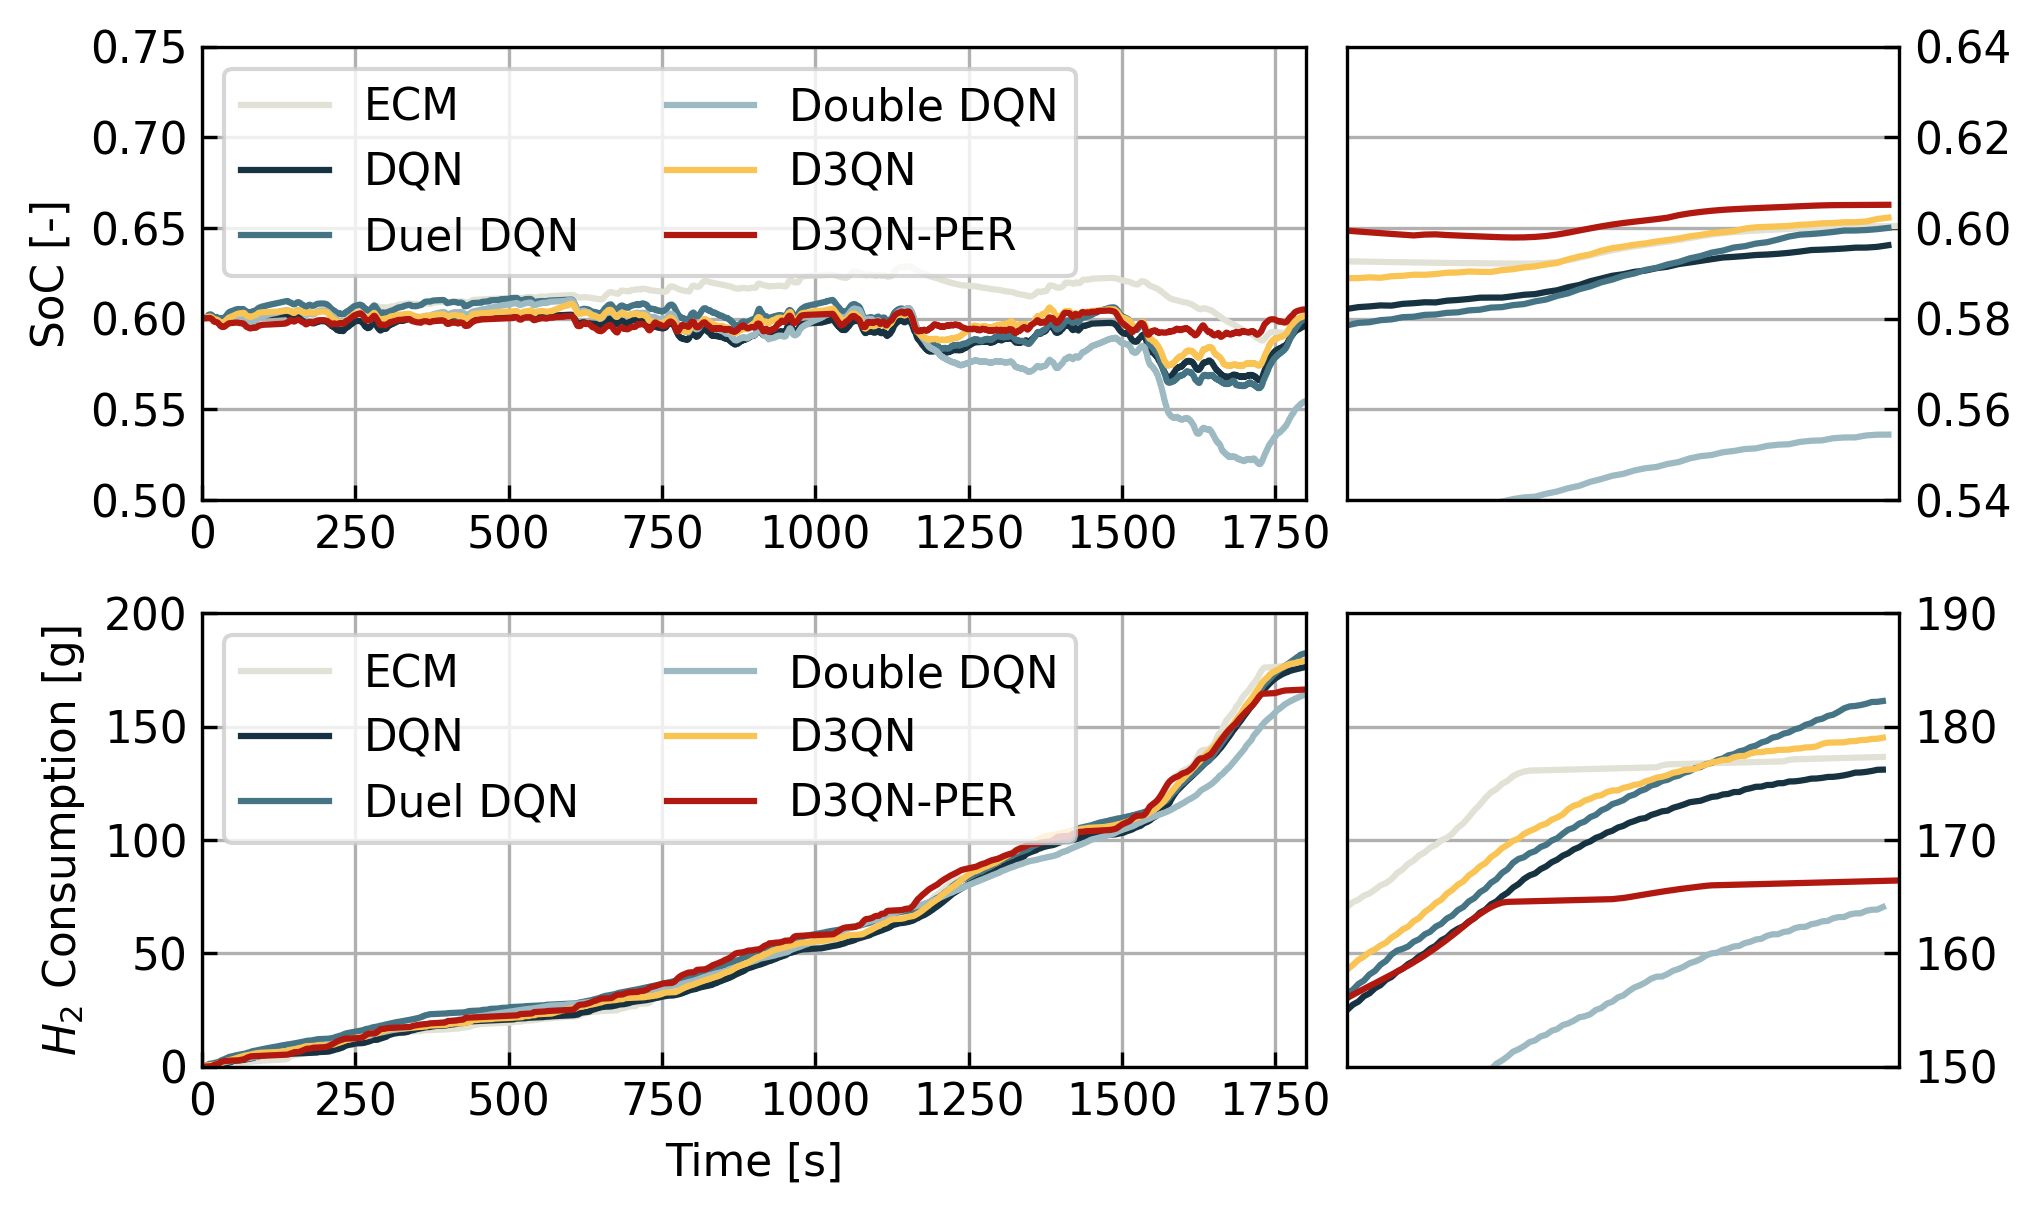

In [53]:
fig, [[ax1,ax3], [ax2, ax4]] = plt.subplots(2, 2, sharex=False, sharey=False, facecolor='white', 
                                            figsize=(6.9,4), dpi=300,gridspec_kw={'width_ratios': [2, 1]})
fig.subplots_adjust(left=0.1, right=0.92, top=0.95, bottom=0.1,hspace=0.25,wspace=0.05)
plt.rcParams.update({'font.size': 10.5})  # 9pt for all text
ncol_num = 2
label_name = ['ECM','DQN','Duel DQN','Double DQN','D3QN','D3QN-PER']
loc_inf = {'horizontalalignment':'left','verticalalignment':'center_baseline',}

cycle_idx = 1
x_lim = len(dqn['Mot_pwr'])

ax1.plot(ecm_soc, color = line_color6)
ax1.plot(dqn_soc, color = line_color5)
ax1.plot(dueldqn_soc, color = line_color4)
ax1.plot(ddqn_soc, color = line_color3)
ax1.plot(d3qn_soc, color = line_color2)
ax1.plot(d3qn_pre_soc, color = line_color1)

ax1.legend(loc = 2, framealpha=0.8, labels=label_name, ncol=ncol_num)
ax1.grid()
# ax1.set_xlabel('Time [s]')
ax1.set_ylabel('SoC [-]')
ax1.set_xlim(0,x_lim)
ax1.set_ylim(0.5,0.75)
ax1.tick_params(axis='both', direction='in')
# ax1.set_xticks([])

ax2.plot(d3qn_pre_fuel, color = line_color6)
ax2.plot(dqn_fuel, color = line_color5)
ax2.plot(dueldqn_fuel, color = line_color4)
ax2.plot(ddqn_fuel, color = line_color3)
ax2.plot(d3qn_fuel, color = line_color2)
# ax2.plot(, color = line_color1)
ax2.plot(ecm_fuel, color = line_color1, label='D3QN-PER')

ax2.legend(loc = 0, framealpha=0.8, labels=label_name, ncol=ncol_num)
ax2.grid()
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('$H_{2}$ Consumption [g]')
ax2.set_xlim(0,x_lim)
ax2.set_ylim(0,200)
ax2.tick_params(axis='both', direction='in')

ax3.plot(ecm_soc, color = line_color6, label='ECM')
ax3.plot(dqn['Bat_soc'], color = line_color5,label='DQN')
ax3.plot(dueldqn['Bat_soc'], color = line_color4,label='Duel DQN')
ax3.plot(ddqn['Bat_soc'], color = line_color3,label='DDQN')
ax3.plot(d3qn['Bat_soc'], color = line_color2,label='D3QN')
ax3.plot(d3qn_pre['Bat_soc'], color = line_color1,label='D3QN-PER')

# ax3.legend(loc = 'best', framealpha=1, ncol=ncol_num)
ax3.grid()
# ax3.text(0.5,0.92, title_name_2[0],loc_inf,transform=ax4.transAxes)
ax3.set_xlim(1750,x_lim)
ax3.set_ylim(0.54,0.64)
ax3.set_xticks([])
# ax3.set_yticks([])
ax3.yaxis.set_label_position('right')
ax3.yaxis.tick_right()
ax3.tick_params(axis='both', direction='in')

ax4.plot(d3qn_pre_fuel, color = line_color6, label='ECM')
ax4.plot(dqn_fuel, color = line_color5, label='DQN')
ax4.plot(dueldqn_fuel, color = line_color4, label='Duel DQN')
ax4.plot(ddqn_fuel, color = line_color3, label='DDQN')
ax4.plot(d3qn_fuel, color = line_color2, label='D3QN')
ax4.plot(ecm_fuel, color = line_color1, label='D3QN-PER')

# ax4.legend(loc = 'best', framealpha=1, ncol=ncol_num)
ax4.grid()
# ax4.text(0.5,0.92, title_name_2[1],loc_inf,transform=ax5.transAxes)
ax4.set_xlim(1700,x_lim)
ax4.set_ylim(150,190)
ax4.set_xticks([])
# ax4.set_yticks([])
ax4.yaxis.set_label_position('right')
ax4.yaxis.tick_right()
ax4.tick_params(axis='both', direction='in')

# Save the figure as a TIFF file
fig.savefig('SOC_and_h2consumption.tiff', format='tiff', dpi=300)

In [15]:
# penguins = sns.load_dataset("penguins")
# sns.displot(penguins, x="flipper_length_mm", hue="species")
# penguins['species']
ecm_pwr = ecm['FCS_pwr'].flatten()

In [16]:
# 创建以5kW为间隔的bins
bins = np.arange(0, 45, 5)

# 对每个算法进行计数统计
ecm_counts, data = np.histogram(ecm_pwr, bins=bins)
dqn_counts, _ = np.histogram(dqn['FCS_pwr'] / 1000, bins=bins)
dueldqn_counts, _ = np.histogram(dueldqn['FCS_pwr'] / 1000, bins=bins)
ddqn_counts, _ = np.histogram(ddqn['FCS_pwr'] / 1000, bins=bins)
d3qn_counts, _ = np.histogram(d3qn['FCS_pwr'] / 1000, bins=bins)
d3qn_pre_counts, _ = np.histogram(d3qn_pre['FCS_pwr'] / 1000, bins=bins)

all_data = {'count':[], 'name':[], 'power':[]}
algorithms = ['ecm', 'dqn', 'dueldqn','ddqn','d3qn','d3qnpre']
j = 0

for i in range(len(data)-1):
    all_data['count'].append(float(ecm_counts[i]))
    all_data['name'].append(algorithms[j])
    all_data['power'].append(int(data[i]))
j = 1

for name in [dqn,dueldqn,ddqn,d3qn,d3qn_pre]:
    counts, data = np.histogram(name['FCS_pwr'] / 1000, bins=bins)
    # print(counts)
    for i in range(len(data)-1):
        all_data['count'].append(float(counts[i]))
        all_data['name'].append(algorithms[j])
        all_data['power'].append(int(data[i]))
    j+=1

df = pd.DataFrame(all_data, columns=['count', 'name', 'power'])
df.head()

,count,name,power
0,1062.0,ecm,0
1,330.0,ecm,5
2,185.0,ecm,10
3,99.0,ecm,15
4,62.0,ecm,20


In [17]:
power = np.array([0, 2, 5, 7.5, 10, 20, 30, 40, 50])
eff = np.array([10, 33, 49.2, 53.3, 55.9, 59.6, 59.1, 56.2, 50.8])/100
eff_data = {'power':power,'eff':eff}
eff_df = pd.DataFrame(eff_data, columns=['power','eff'])

In [18]:
data[1:]

array([ 5, 10, 15, 20, 25, 30, 35, 40])

In [19]:
ecm_counts

array([1062,  330,  185,   99,   62,   50,   13,    0])

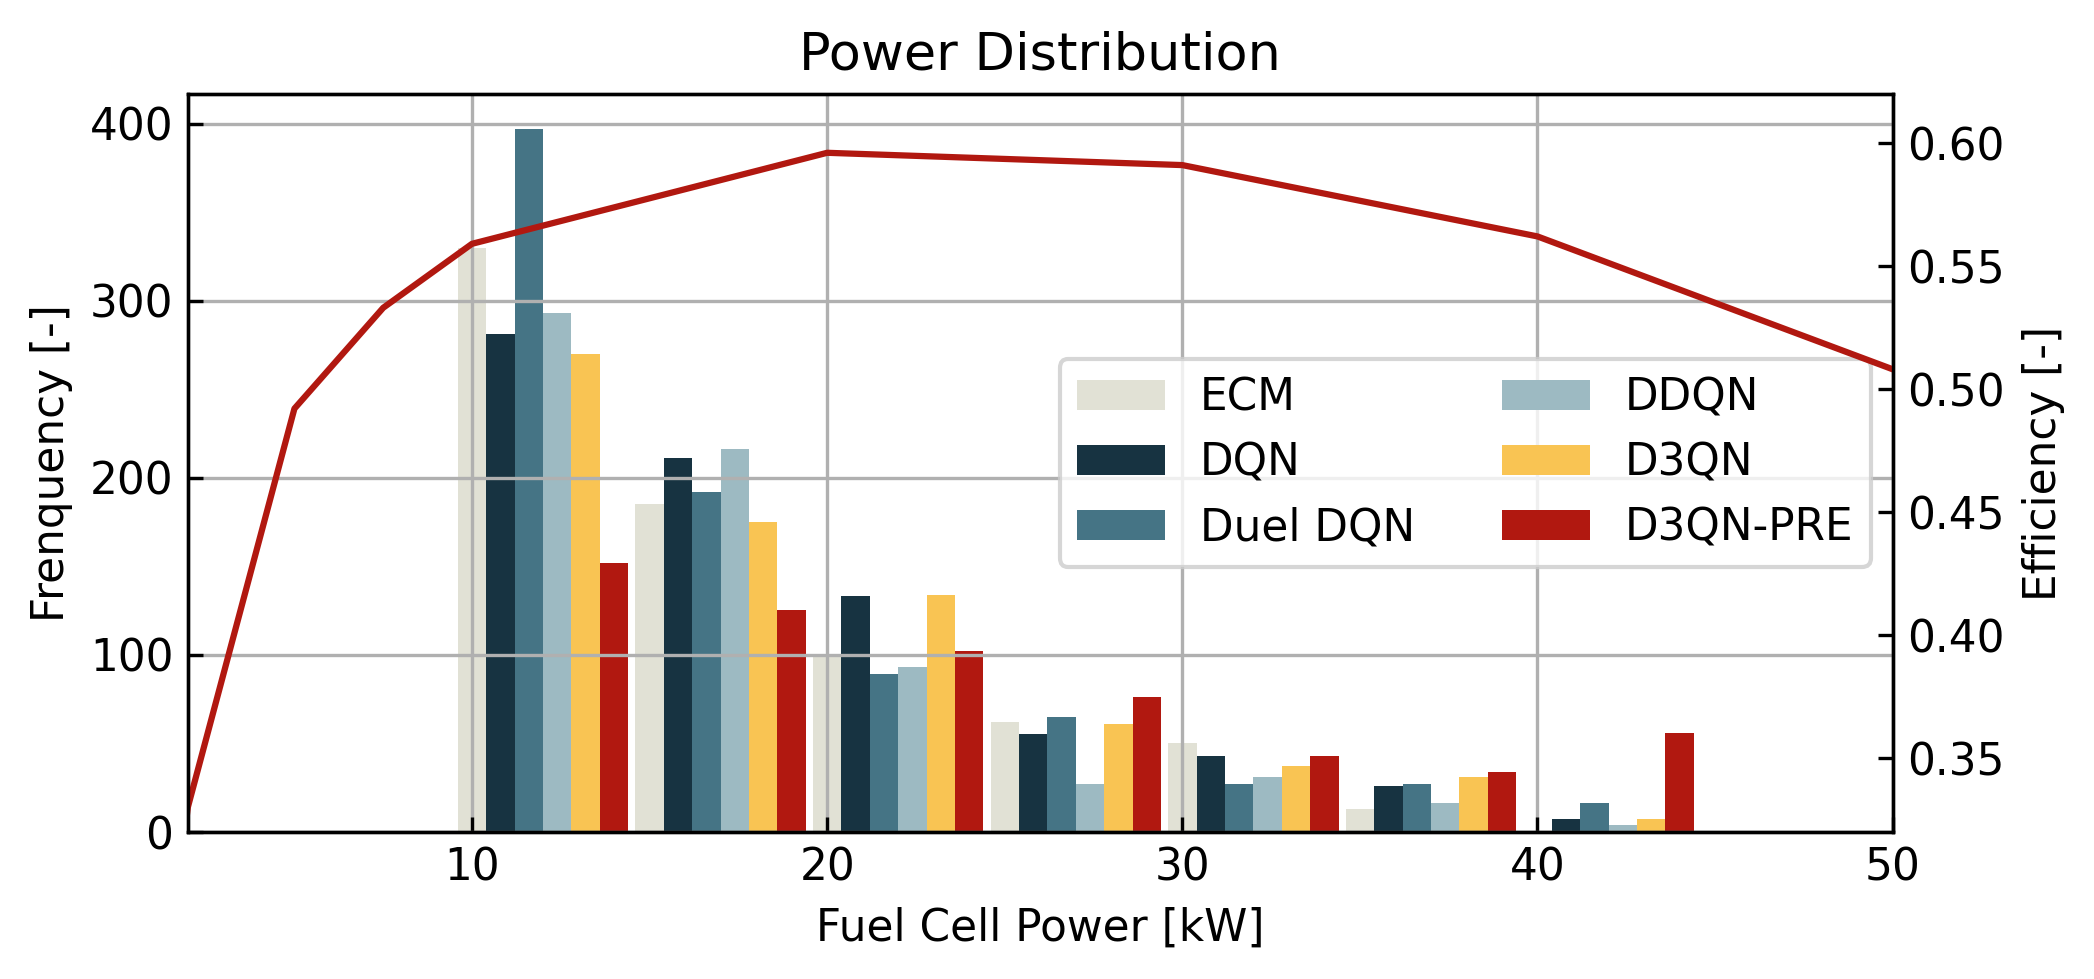

In [44]:
# 创建画布
fig, ax = plt.subplots(figsize=(6.93, 3), dpi=300)
fig.subplots_adjust(left=0.1, right=0.92, top=0.99, bottom=0.17,hspace=0.05,wspace=0.05)
plt.rcParams.update({'font.size': 10.5})  # 9pt for all text
# 绘制概率分布
width = 0.8
# ax.bar(data[1:-1],ecm_counts[0:-1], color = line_color5,label='ecm',width=width)
# ax.bar(data[1:-1]+width,dqn_counts[0:-1], color = line_color5,label='dqn',width=width)
# ax.bar(data[1:-1]+width*2,dueldqn_counts[0:-1], color = line_color4,label='dueldqn',width=width)
# ax.bar(data[1:-1]+width*3,ddqn_counts[0:-1], color = line_color3,label='ddqn',width=width)
# ax.bar(data[1:-1]+width*4,d3qn_counts[0:-1], color = line_color2,label='d3qn',width=width)
# ax.bar(data[1:-1]+width*5,d3qn_pre_counts[0:-1], color = line_color1,label='d3qn_pre',width=width)
ax.bar(data[2::],ecm_counts[1::], color = line_color6,label='ECM',width=width)
ax.bar(data[2::]+width,dqn_counts[1::], color = line_color5,label='DQN',width=width)
ax.bar(data[2::]+width*2,dueldqn_counts[1::], color = line_color4,label='Duel DQN',width=width)
ax.bar(data[2::]+width*3,ddqn_counts[1::], color = line_color3,label='DDQN',width=width)
ax.bar(data[2::]+width*4,d3qn_counts[1::], color = line_color2,label='D3QN',width=width)
ax.bar(data[2::]+width*5,d3qn_pre_counts[1::], color = line_color1,label='D3QN-PRE',width=width)
ax2 = ax.twinx()
ax2.plot(power,eff,color = line_color1,label='Right Axis')
ax2.set_xlim(2,50)
ax2.set_ylim(0.32,0.62)
# sns.histplot(data=df,x='power',y='count',hue='name',stat='count',palette=custom_palette, multiple="dodge")
# sns.barplot(data=df,x='power',y='count',hue='name',palette=custom_palette,ax =ax, )
# sns.lineplot(data=eff_df,x='power',y='eff',ax =ax,)
# 添加分布曲线（KDE）到每个柱子
# sns.kdeplot(data=df, x='power', hue='name', common_norm=False, ax=ax, 
#             palette=custom_palette, linewidth=2, bw_adjust=0.01)
# sns.distplot(dqn['FCS_pwr'] / 1000, bins = 5, color = 'black', kde = False, ax=ax)
# sns.distplot(dueldqn['FCS_pwr'] / 1000, bins = 5, color = 'black', kde = False, ax=ax)
# sns.distplot(ddqn['FCS_pwr'] / 1000, bins = 5, color = 'black', kde = False, ax=ax)
# sns.distplot(d3qn['FCS_pwr'] / 1000, bins = 5, color = 'black', kde = False, ax=ax)
# sns.barplot(dqn['FCS_pwr'] / 1000, bins=5, kde=False, color=line_color1,multiple="dodge", shrink=0.8, element='step',stat='density', ax=ax)
# sns.histplot(dueldqn['FCS_pwr'] / 1000, bins=5, kde=False, color=line_color2,multiple="dodge", shrink=0.8, element='step',stat='density', ax=ax)
# sns.histplot(ddqn['FCS_pwr'] / 1000, bins=5, kde=False, color=line_color3,multiple="dodge", shrink=0.8, element='step',stat='density', ax=ax)
# sns.histplot(d3qn['FCS_pwr'] / 1000, bins=5, kde=False, color=line_color4,multiple="dodge", shrink=0.8,element='step', stat='density', ax=ax)
# sns.barplot(dqn_counts, color=line_color4, ax=ax)
# sns.barplot(dueldqn_counts, color=line_color3, ax=ax)
# sns.barplot(ddqn_counts, color=line_color2)
# sns.barplot(d3qn_counts, color=line_color1)

# # 添加均值和中位数线
# ax.axvline(np.mean(dqn['FCS_pwr'] / 1000), color='red', linestyle='--', label='Mean')
# ax.axvline(np.median(dqn['FCS_pwr'] / 1000), color='green', linestyle='--', label='Median')

# 图示信息
ax.set_xlabel('Fuel Cell Power [kW]')
ax2.set_ylabel('Efficiency [-]')
ax.set_ylabel('Frenquency [-]')
ax.set_title('Power Distribution')
# ax.legend(loc='upper right')
ax.grid(True)
ax.tick_params(axis='both', direction='in')
ax2.tick_params(axis='both', direction='in')
ax.legend(loc=5, framealpha=0.8, ncol=2)

fig.savefig('PowerDistribution.tiff', format='tiff', dpi=300)

In [21]:
# sns.jointplot(
#     df, x="power", y="count",hue='name',
#     kind="kde", rug=True
# )
# # g = sns.PairGrid(df)
# # g.map_upper(sns.histplot)
# # g.map_lower(sns.kdeplot, fill=True)
# # g.map_diag(sns.histplot, kde=True)

In [22]:
# cltp = loadmat('./StandardCycle_kph_column\')

In [23]:
# fig, [ax1,ax2,ax3] = plt.subplots(4, 1, sharex=True, sharey=True, facecolor='white', figsize=(8,6), dpi=300)
# fig.subplots_adjust(left=0.09, right=0.97, top=0.99, bottom=0.09,hspace=0.05,wspace=0.05)

# file_name = ['(a) WLTC_1','(b) CLTC_P','(c) C_CFN','(d) RealDC',]
# title_name = [x.replace('_', '-') for x in file_name]
# loc_inf = {'horizontalalignment':'center','verticalalignment':'center_baseline',}

# ax = [ax1,ax2,ax3,ax4]
# for k in range(len(file_name)):
#     if k < 2:
#         cycle_path = r'StandardCycle_kph_column\NewAdded\\'
#     else:
#         cycle_path = r'StandardCycle_kph_column\\'
#     data = scio.loadmat(cycle_path + file_name[k][4:] + ".mat")
#     spd_vector = np.squeeze(data[list(data.keys())[3]]) # km/h
#     ax[k].plot(spd_vector)
#     ax[k].set_xlim(0,len(spd_vector))
#     # ax[k].set_ylim(0,max(spd_vector))
#     ax[k].set_ylabel('$v$ [km/h]')
#     ax[k].grid()
#     ax[k].text(0.5,0.9, title_name[k],loc_inf,transform=ax[k].transAxes)
# ax[-1].set_xlabel('Time [s]')
# ax[-2].plot([1801]*2, [0, 100],'k')
# ax[-2].plot([3173]*2, [0, 100],'k')
# ax[-2].text(1801/2/5000,0.6, 'CLTC-P',loc_inf,transform=ax[-2].transAxes)
# ax[-2].text(1801/5000+1372/2/5000,0.6, 'FTP-72',loc_inf,transform=ax[-2].transAxes)
# ax[-2].text(1801/5000+1372/5000+1180/2/5000,0.6, 'NEDC',loc_inf,transform=ax[-2].transAxes)

# # fig.savefig(r"Fig\DrivingCycle.png")
